# Лабораторная работа №1
###  Исходные данные
**Датасет**: https://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions
<br>
**Предметная область**: Человеческая активность, различные движения
<br>**Список классов**:
1. WALKING
2. WALKING_UPSTAIRS
3. WALKING_DOWNSTAIRS
4. SITTING
5. STANDING
6. LAYING
7. STAND_TO_SIT
8. SIT_TO_STAND
9. SIT_TO_LIE
10. LIE_TO_SIT
11. STAND_TO_LIE
12. LIE_TO_STAND

**Количество атрибутов**: 561
<br>
**Основные атрибуты**: Измерения гироскопа и акселерометра в 3х осях, фильтры их значений
<br>
**Полный список атрибутов**: Features.txt
### Ход работы
#### Исходный код


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import Normalize
import warnings; warnings.simplefilter('ignore')

import utils
from data import Data


class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


def test_kernel_functions(data):
    C = 1.0
    svc = svm.SVC(kernel='linear', C=C).fit(data.train_data, data.train_classes)
    lin_svc = svm.LinearSVC(C=C).fit(data.train_data, data.train_classes)
    rbf_svc = svm.SVC(kernel='rbf', C=C).fit(data.train_data, data.train_classes)
    sigmoid_svc = svm.SVC(kernel='sigmoid', C=C).fit(data.train_data, data.train_classes)
    poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(data.train_data, data.train_classes)

    titles = ['SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with rbf kernel',
              'SVC with sigmoid kernel',
              'SVC with poly kernel']

    for i, clf in enumerate((svc, lin_svc, rbf_svc, sigmoid_svc, poly_svc)):
        pred = clf.predict(data.test_data)
        print('Accuracy for {}: {:.2%}'.format(titles[i], metrics.accuracy_score(data.test_classes, pred)))


def poly_c_gamma_test(data):
    C_range = np.logspace(-2, 7, 10)
    gamma_range = np.logspace(-9, 0, 10)
    param_grid = dict(gamma=gamma_range, C=C_range)

    scores = get_svc_accuracy(param_grid, len(C_range), len(gamma_range), data)

    draw(scores, gamma_range, C_range, 'gamma', 'C')


def poly_c_coef_test(data):
    C_range = np.logspace(-3, 4, 8)
    coef0_range = np.logspace(-4, 3, 8)
    param_grid = dict(coef0=coef0_range, C=C_range)

    scores = get_svc_accuracy(param_grid, len(C_range), len(coef0_range), data)

    draw(scores, coef0_range, C_range, 'coef0', 'C')


def poly_c_degre_test(data):
    C_range = np.logspace(-2, 5, 8)
    degree_range = np.linspace(1, 4.5, 8)
    param_grid = dict(degree=degree_range, C=C_range)

    scores = get_svc_accuracy(param_grid, len(C_range), len(degree_range), data)

    draw(scores, degree_range, C_range, 'degree', 'C')


def get_svc_accuracy(param_grid, fst_length, scnd_length, data):
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    grid = GridSearchCV(svm.SVC(kernel='linear'), param_grid=param_grid, cv=cv)
    grid.fit(data.data, data.classes)

    return grid.cv_results_['mean_test_score'].reshape(scnd_length, fst_length)


def draw(scores, fst_range, scnd_range, fst_name, scnd_name):
    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
               norm=MidpointNormalize(vmin=0.2, midpoint=0.86))
    plt.xlabel(fst_name)
    plt.ylabel(scnd_name)
    plt.colorbar()
    plt.xticks(np.arange(len(fst_range)), fst_range, rotation=45)
    plt.yticks(np.arange(len(scnd_range)), scnd_range)
    plt.title('Validation accuracy')
    plt.show()



Ввиду слишком долгого вычисления в этой реализации, возьмем небольшой набор данных из исходного датасета

Сравним следующие ядра:

1. SVC with linear kernel,
2. LinearSVC,
3. SVC with rbf kernel,
4. SVC with sigmoid kernel,
5. SVC with poly kernel,


In [4]:
    file_data, file_classes = utils.load_data()
    data = Data(file_data, file_classes, 0.1,  0.7, 30)
    test_kernel_functions(data)


Accuracy for SVC with linear kernel: 79.40%
Accuracy for LinearSVC (linear kernel): 76.39%
Accuracy for SVC with rbf kernel: 58.80%
Accuracy for SVC with sigmoid kernel: 49.79%
Accuracy for SVC with poly kernel: 41.63%


Из результатов сравнения видно, что лучше всего показало себя линейное ядро<br>
Есть ещё параметр С общий для всех ядер SVM. Является регулирующей константой, разрешающей конфликт между двумя задачами: максимизацией зазора и минимизацией потерь.
<br><br>
Посмотрим, как влияют изменения С и y на способность предсказания классов:



In [ ]:
poly_c_gamma_test(data)

Теперь, как влияют изменения С и y на способность предсказания классов:



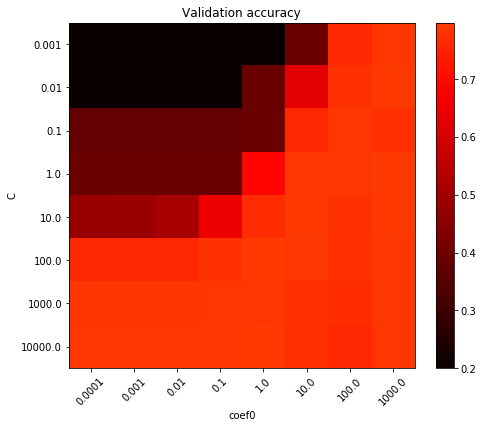

In [6]:
poly_c_coef_test(data)


Теперь, как влияют изменения С и d на способность предсказания классов:



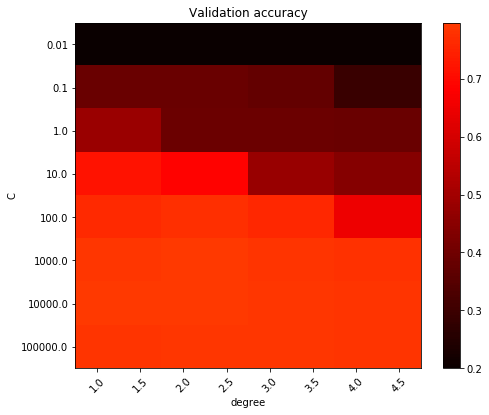

In [7]:
poly_c_degre_test(data)



Посмотрим на влияние коэффициентов d и y:



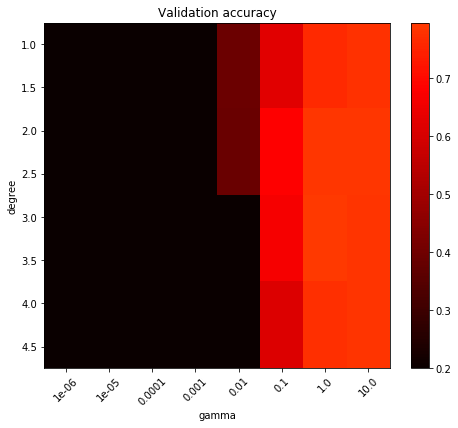

In [9]:
degree_range = np.linspace(1, 4.5, 8)
gamma_range = np.logspace(-6, 1, 8)
param_grid = dict(gamma=gamma_range, degree=degree_range)

scores = get_svc_accuracy(param_grid, len(gamma_range), len(degree_range), data)
draw(scores, gamma_range, degree_range, 'gamma', 'degree')


Теперь проверим показатели полиномиального ядра с наилучшими показателями коэффициентов:



In [ ]:
poly_svc = svm.SVC(kernel='poly', coef0=0.5, degree=2, C=1, gamma=1).fit(data.train_x, data.train_y)
pred = poly_svc.predict(data.test_x)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(data.test_y, pred)))


### Вывод
В ходе лабораторной работы были получены практические навыки работы с метрическими методами машинного обучения на практических примерах с использованием языка программирования python и библиотеки sklearn.
<br>
<br>
Были использованы классификаторы K Nearest Neighbor Classifier и Naive Bayes Classifier из библиотеки sklearn, а также имплиментироваы собственные реализации данных алгоритмов. Библиотечные и реализованные алгоритмы показали примерно одинаковую высокую точность предсказаний.
